In [1]:
# importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import requests
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
chikungunya_casos_por_ano = pd.read_csv('chikungunya_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
chikungunya_casos_por_ano.head()

,UF de notificação,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,863,464,578,1077,433,544,984,1971,6914
1,12 Acre,363,640,151,274,667,222,304,623,3244
2,13 Amazonas,601,205,207,123,370,478,582,335,2901
3,14 Roraima,6760,508,514,151,341,447,504,529,9754
4,15 Pará,11869,12348,6275,1953,947,1625,2375,6304,43696


In [3]:
dengue_casos_por_ano = pd.read_csv('dengue_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_casos_por_ano.head()

,UF de notificação,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,20,1994,2250,7916,2196,537,990,3957,2293,14260,10700,4991,52104
1,12 Acre,13,28464,6067,2252,1885,7337,10192,7731,15004,3518,7190,4309,93962
2,13 Amazonas,30,6318,3662,7516,3902,2322,3986,6052,8274,5359,6269,8065,61755
3,14 Roraima,10,1128,1110,210,284,111,1605,493,111,62,224,580,5928
4,15 Pará,21,4540,7853,10883,7827,3778,5395,3538,5078,5916,5688,19696,80213


In [4]:
zika_casos_por_ano = pd.read_csv('zika_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
zika_casos_por_ano.head()

,UF de notificação,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,1881,516,271,441,588,294,315,496,2154,6956
1,12 Acre,1531,295,365,150,305,622,104,908,656,4936
2,13 Amazonas,6023,699,469,122,133,223,360,367,222,8618
3,14 Roraima,362,855,155,191,74,194,118,300,365,2614
4,15 Pará,6632,1456,808,402,440,252,578,460,728,11756


In [5]:
# Removendo parte numérica da coluna UF de notificação
chikungunya_casos_por_ano['UF de notificação'] = chikungunya_casos_por_ano['UF de notificação'].str.replace(r'^\d+\s*', '', regex=True)
dengue_casos_por_ano['UF de notificação'] = dengue_casos_por_ano['UF de notificação'].str.replace(r'^\d+\s*', '', regex=True)
zika_casos_por_ano['UF de notificação'] = zika_casos_por_ano['UF de notificação'].str.replace(r'^\d+\s*', '', regex=True)

In [6]:
# Removendo as linhas de total
chikungunya_casos_por_ano.drop((27), inplace=True)
dengue_casos_por_ano.drop(index = [27, 28], inplace=True)
zika_casos_por_ano.drop((27), inplace=True)

In [7]:
# Removendo as colunas de total
chikungunya_casos_por_ano.drop(columns=['Total'], inplace=True)
dengue_casos_por_ano.drop(columns=['Total'], inplace=True)
zika_casos_por_ano.drop(columns=['Total'], inplace=True)

In [ ]:
# Verificando o tipo de cada coluna
chikungunya_casos_por_ano.info()

In [ ]:
# Verificando o tipo de cada coluna
dengue_casos_por_ano.info()

In [ ]:
# Verificando o tipo de cada coluna
zika_casos_por_ano.info()

In [8]:
# Removendo colunas para que todas as planilhas fiquem com as mesmas colunas
dengue_casos_por_ano.drop(columns=['2013', '2014', '2015', '2016'], inplace=True)
zika_casos_por_ano.drop(columns=['2016'], inplace=True)

In [9]:
# Convertendo valores para o tipo numérico
chikungunya_casos_por_ano[['2021', '2022', '2023', '2024']] = chikungunya_casos_por_ano[['2021', '2022', '2023', '2024']].apply(pd.to_numeric, errors='coerce').fillna(0)
dengue_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']] = dengue_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].apply(pd.to_numeric, errors='coerce').fillna(0)
zika_casos_por_ano[['2021', '2022', '2023', '2024']] = zika_casos_por_ano[['2021', '2022', '2023', '2024']].apply(pd.to_numeric, errors='coerce').fillna(0)

In [10]:
# Após a conversão para o tipo numérico, as colunas convertidas ficaram no formato float
# Para converter para inteiros é necessário, primeiramente, verificar se relamente não existem decimais
# Verifique se há decimais (valores não inteiros)
print(chikungunya_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].apply(lambda x: x % 1 != 0).any())
print(dengue_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].apply(lambda x: x % 1 != 0).any())
print(zika_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].apply(lambda x: x % 1 != 0).any())

2017    False
2018    False
2019    False
2020    False
2021    False
2022    False
2023    False
2024    False
dtype: bool
2017    False
2018    False
2019    False
2020    False
2021    False
2022    False
2023    False
2024    False
dtype: bool
2017    False
2018    False
2019    False
2020    False
2021    False
2022    False
2023    False
2024    False
dtype: bool


In [11]:
# Como não há nenhum valor decimal, é possível converter as colunas para inteiros sem erros
# Convertendo todas as colunas para inteiros
chikungunya_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']] = chikungunya_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].astype('int64')
dengue_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']] = dengue_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].astype('int64')
zika_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']] = zika_casos_por_ano[['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].astype('int64')

O próximo passo é juntar as três planilhas. Para isso, é necessário criar uma coluna com a categoria (doença), para que os dados não se misturem

In [12]:
# Adicionando a coluna de categoria
chikungunya_casos_por_ano['Doença'] = 'Chikungunya'
dengue_casos_por_ano['Doença'] = 'Dengue'
zika_casos_por_ano['Doença'] = 'Zika'

In [13]:
# Passo 1: Adicionar a coluna "Doença" a cada DataFrame
chikungunya_casos_por_ano['Doença'] = 'Chikungunya'
dengue_casos_por_ano['Doença'] = 'Dengue'
zika_casos_por_ano['Doença'] = 'Zika'

# Passo 2: Concatenar
casos_combined = pd.concat([chikungunya_casos_por_ano, dengue_casos_por_ano, zika_casos_por_ano], axis=0)

# Passo 3: Transformar em formato longo
casos_long = pd.melt(
    casos_combined,
    id_vars=['UF de notificação', 'Doença'],
    value_vars=['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
    var_name='Ano',
    value_name='Casos'
)

Visualização dos Dados

c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

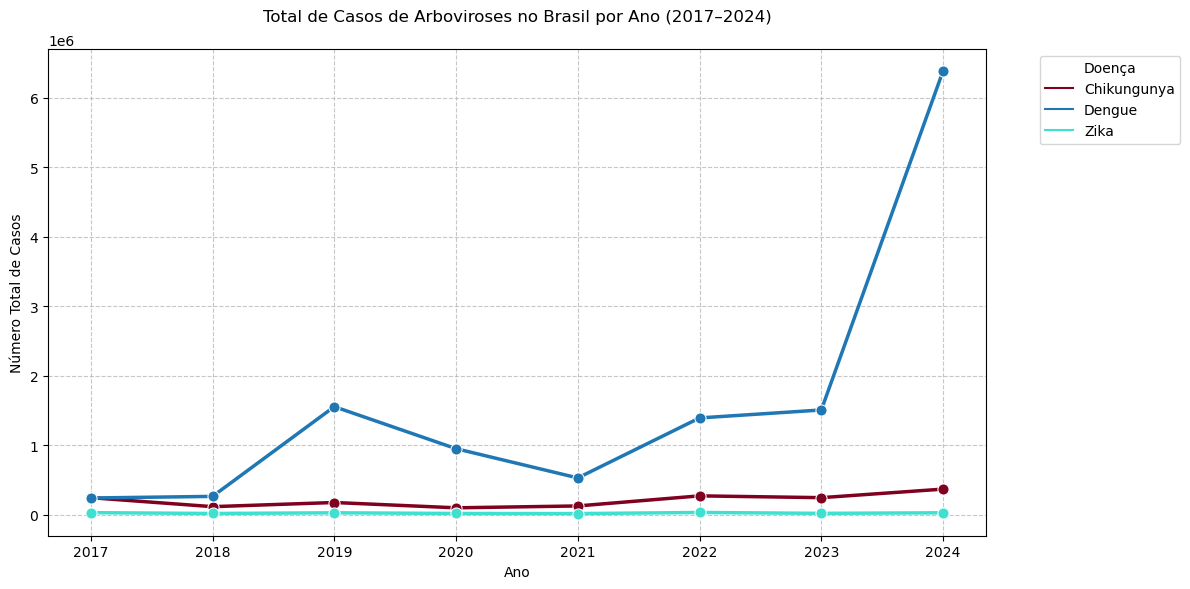

In [14]:
# Passo 2: Agregar casos por ano e doença (soma de todos os estados)
casos_agg = casos_long.groupby(['Ano', 'Doença'], as_index=False)['Casos'].sum()

# Passo 3: Definir paleta de cores
paleta_doencas = {
    "Dengue": "#1F77B4",       # Azul
    "Zika": "#40E0D0",         # Turquesa
    "Chikungunya": "#800020"   # Vinho
}

# Passo 4: Plotar gráfico de linhas (total por doença por ano)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=casos_agg,
    x='Ano',
    y='Casos',
    hue='Doença',
    palette=paleta_doencas,
    marker='o',
    linewidth=2.5,
    markersize=8
)

plt.title('Total de Casos de Arboviroses no Brasil por Ano (2017–2024)', pad=20)
plt.ylabel('Número Total de Casos')
plt.xlabel('Ano')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Doença', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

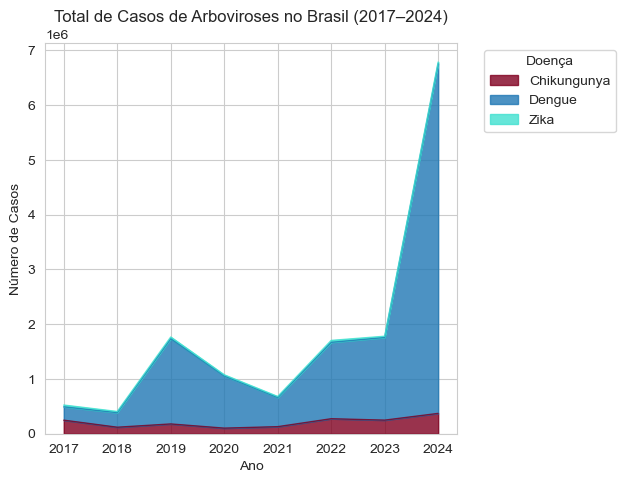

In [16]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Pivot para formato wide (necessário para areaplot)
casos_pivot = casos_agg.pivot(index='Ano', columns='Doença', values='Casos')

# Plot
casos_pivot.plot.area(
    color=paleta_doencas,
    alpha=0.8,  # Transparência
    linewidth=1
)

plt.title('Total de Casos de Arboviroses no Brasil (2017–2024)')
plt.ylabel('Número de Casos')
plt.xlabel('Ano')
plt.legend(title='Doença', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

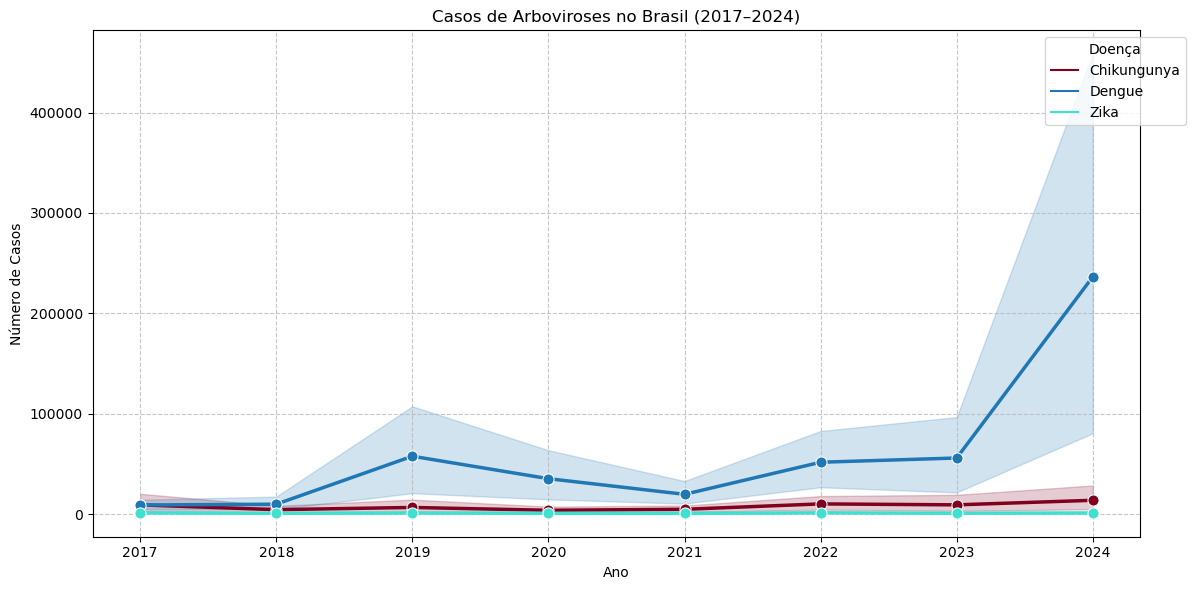

In [15]:
plt.figure(figsize=(12, 6))

# Paleta customizada (HEX ou nomes CSS)
paleta_doencas = {
    "Dengue": "#1F77B4",          # Azul tradicional
    "Zika": "#40E0D0",            # Turquesa (verde-azulado)
    "Chikungunya": "#800020"      # Vinho/marrom-avermelhado
}

sns.lineplot(
    data=casos_long,
    x='Ano',
    y='Casos',
    hue='Doença',
    palette=paleta_doencas,       # Aplica o dicionário de cores
    marker='o',
    linewidth=2.5,
    markersize=8
)

plt.title('Casos de Arboviroses no Brasil (2017–2024)')
plt.ylabel('Número de Casos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Doença', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
with PdfPages('casos_arboviroses.pdf') as pdf:
    plt.figure(figsize=(12, 6))

#    Paleta customizada (HEX ou nomes CSS)
    paleta_doencas = {
        "Dengue": "#1F77B4",          # Azul tradicional
        "Zika": "#40E0D0",            # Turquesa (verde-azulado)
        "Chikungunya": "#800020"      # Vinho/marrom-avermelhado
    }

    sns.lineplot(
        data=casos_long,
        x='Ano',
        y='Casos',
        hue='Doença',
        palette=paleta_doencas,       # Aplica o dicionário de cores
        marker='o',
        linewidth=2.5,
        markersize=8
    )

    plt.title('Casos de Arboviroses no Brasil (2017–2024)')
    plt.ylabel('Número de Casos')
    plt.legend(title='Doença', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    pdf.savefig()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=casos_long,
    x='Ano',
    y='Casos',
    hue='Doença',
    marker='o',  # Marcadores para cada ponto
    linewidth=2.5
)
plt.title('Casos de Arboviroses no Brasil (2017–2024)')
plt.ylabel('Número de Casos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Doença', bbox_to_anchor=(1.05, 1))  # Legenda fora do gráfico
plt.tight_layout()
plt.show()

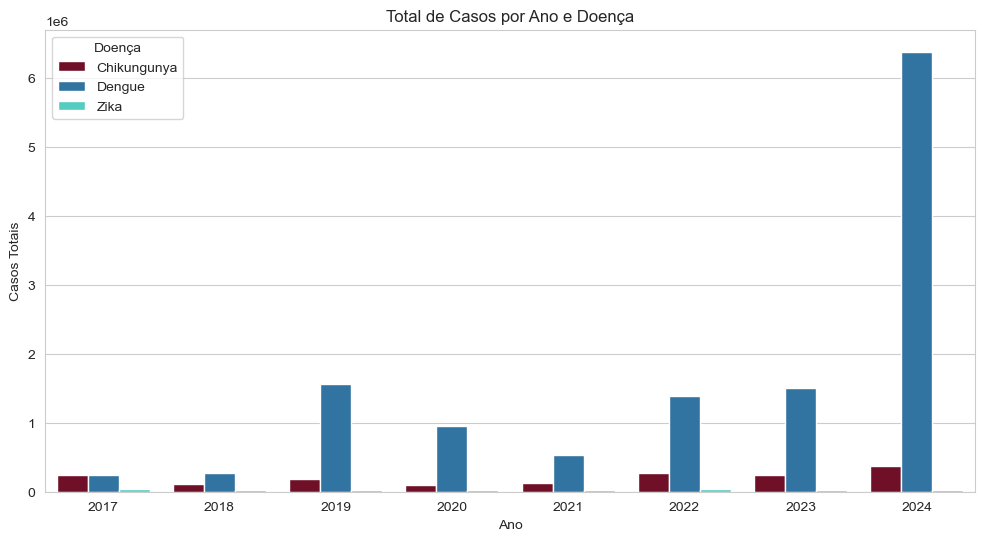

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=casos_long,
    x='Ano',
    y='Casos',
    hue='Doença',
    estimator=sum,  # Soma os casos por ano
    errorbar=None,       # Remove intervalos de confiança
    palette=paleta_doencas
)
plt.title('Total de Casos por Ano e Doença')
plt.ylabel('Casos Totais')
plt.legend(title='Doença')
plt.show()

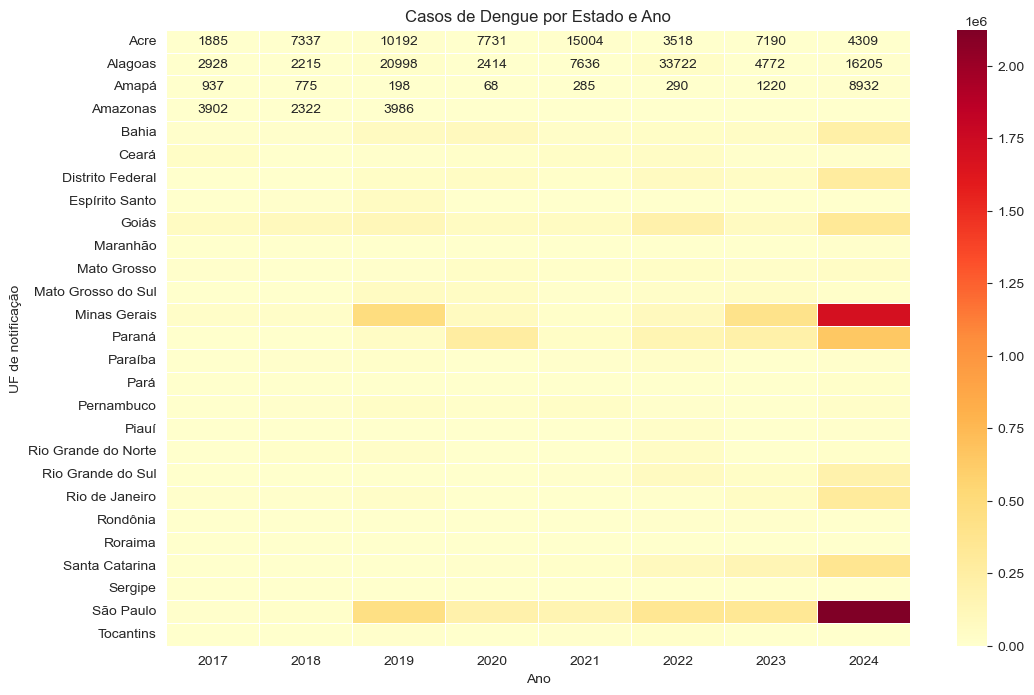

In [20]:
# Filtrar uma doença (ex: Dengue) e pivotar
dengue_pivot = casos_long[casos_long['Doença'] == 'Dengue'].pivot(
    index='UF de notificação',
    columns='Ano',
    values='Casos'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    dengue_pivot,
    cmap='YlOrRd',
    annot=True,          # Mostra valores nas células
    fmt='.0f',           # Formato sem decimais
    linewidths=0.5
)
plt.title('Casos de Dengue por Estado e Ano')
plt.show()

c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

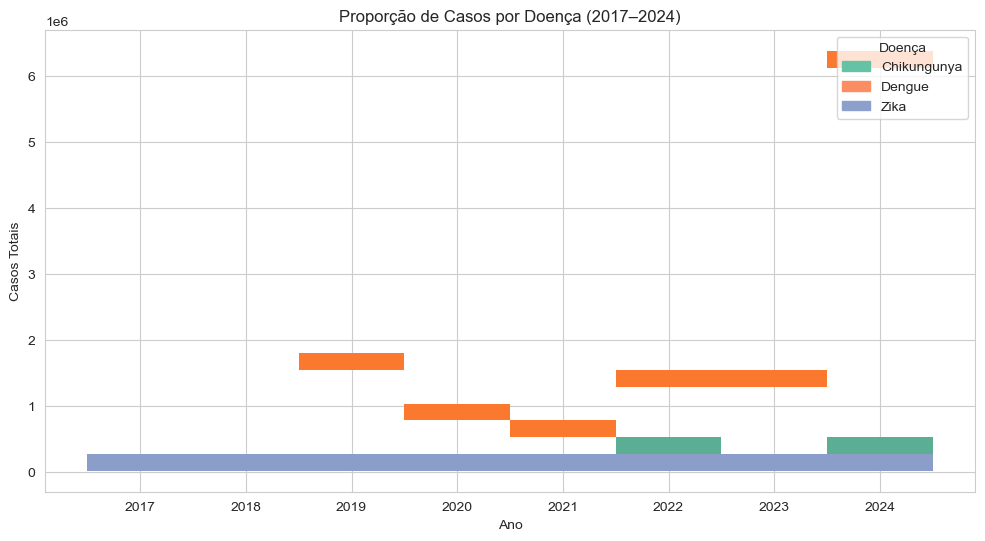

In [21]:
# Agrupar por ano e doença
casos_agg = casos_long.groupby(['Ano', 'Doença'])['Casos'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.histplot(
    data=casos_agg,
    x='Ano',
    y='Casos',
    hue='Doença',
    multiple='stack',  # Empilha as áreas
    palette='Set2'
)
plt.title('Proporção de Casos por Doença (2017–2024)')
plt.ylabel('Casos Totais')
plt.show()

In [ ]:
# Não rodar de novo
pip install --upgrade nbformat>=4.2.0

In [ ]:
import plotly.express as px
import json
import requests

# Baixar GeoJSON do Brasil (exemplo com arquivo online)
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
geojson = requests.get(url).json()

# Criar o mapa
fig = px.choropleth(
    dengue_2023,
    geojson=geojson,
    locations='UF de notificação',  # Nome da coluna com os estados
    featureidkey='properties.name',  # Caminho no GeoJSON para os nomes dos estados
    color='Casos',
    color_continuous_scale='OrRd',
    scope='south america',
    title='Casos de Dengue por Estado (2023)'
)

# Ajustar o zoom para focar no Brasil
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=casos_long,
    x='Doença',
    y='Casos',
    palette='pastel',
    showfliers=True  # Mostra outliers
)
plt.title('Distribuição de Casos por Doença')
plt.show()

In [ ]:
g = sns.FacetGrid(
    casos_long,
    col='UF de notificação',
    col_wrap=4,  # 4 colunas por linha
    height=3,
    sharey=False
)
g.map(sns.lineplot, 'Ano', 'Casos', 'Doença', marker='o')
g.add_legend()
plt.suptitle('Evolução de Casos por Estado e Doença', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm

# Exemplo para Dengue em São Paulo
dados_sp = casos_long[(casos_long['UF de notificação']=='São Paulo') & (casos_long['Doença']=='Dengue')]
X = dados_sp['Ano'].astype(int)  # Converter ano para numérico
y = dados_sp['Casos']

# Regressão linear
X = sm.add_constant(X)  # Adiciona intercepto
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

In [ ]:
import statsmodels.api as sm

# Exemplo para Dengue em São Paulo
dados_sp = casos_long[(casos_long['UF de notificação']=='Rio de Janeiro') & (casos_long['Doença']=='Dengue')]
X = dados_sp['Ano'].astype(int)  # Converter ano para numérico
y = dados_sp['Casos']

# Regressão linear
X = sm.add_constant(X)  # Adiciona intercepto
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

In [ ]:
# Calcular proporção de zeros por doença
prop_zero = casos_long.groupby('Doença')['Casos'].apply(
    lambda x: (x == 0).mean()
).reset_index(name='Proporção de Zeros')

print(prop_zero)

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Configuração
plt.figure(figsize=(14, 8))

# Lista de doenças
doencas = casos_long['Doença'].unique()

# Loop para cada doença
for i, doenca in enumerate(doencas, 1):
    plt.subplot(2, 2, i)  # 2x2 grid de plots
    
    # Filtrar dados
    dados_doenca = casos_long[casos_long['Doença'] == doenca]
    dados_agrupados = dados_doenca.groupby('Ano')['Casos'].sum().reset_index()
    dados_agrupados['Ano_num'] = dados_agrupados['Ano'].astype(int)
    
    # Modelo de tendência
    X = sm.add_constant(dados_agrupados['Ano_num'])
    modelo = sm.OLS(dados_agrupados['Casos'], X).fit()
    
    # Plot
    plt.scatter(dados_agrupados['Ano'], dados_agrupados['Casos'], label='Dados observados')
    plt.plot(dados_agrupados['Ano'], modelo.predict(X), 'r--', label=f'Tendência (R²={modelo.rsquared:.2f})')
    plt.title(f'Tendência Anual - {doenca}')
    plt.xlabel('Ano')
    plt.ylabel('Casos')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm

# Dados agregados por ano
dados_brasil = casos_long.groupby('Ano')['Casos'].sum().reset_index()

# Converter ano para numérico (necessário para regressão)
dados_brasil['Ano_num'] = dados_brasil['Ano'].astype(int)

# Modelo de tendência linear
X = sm.add_constant(dados_brasil['Ano_num'])  # Adiciona intercepto
modelo = sm.OLS(dados_brasil['Casos'], X).fit()

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(dados_brasil['Ano'], dados_brasil['Casos'], label='Dados Observados')
plt.plot(dados_brasil['Ano'], modelo.predict(X), color='red', label='Tendência')
plt.title('Tendência Anual de Casos (2017-2024)')
plt.legend()
plt.show()

In [ ]:
# ANOVA/Tukey (para comparação múltipla)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Comparar médias de casos entre doenças
tukey = pairwise_tukeyhsd(endog=casos_long['Casos'],
                          groups=casos_long['Doença'],
                          alpha=0.05)
tukey.plot_simultaneous()

In [ ]:
# Teste de Mann-Whitney (Comparação não paramétrica)
from scipy.stats import mannwhitneyu

# Comparar duas doenças específicas
dengue = casos_long[casos_long['Doença']=='Dengue']['Casos']
zika = casos_long[casos_long['Doença']=='Zika']['Casos']
stat, p = mannwhitneyu(dengue, zika)
print(f'p-valor: {p:.4f}')

In [ ]:
# Verifique a distribuição por ano
print(casos_long.groupby(['Ano', 'Doença'])['Casos'].sum())

In [ ]:
# 1. Verifique completude dos dados
print("Valores faltantes por coluna:")
print(casos_long.isnull().sum())

# 2. Distribuição dos casos
print("\nEstatísticas descritivas:")
print(casos_long.groupby('Doença')['Casos'].describe())

# 3. Normalidade (exemplo para Dengue)
from scipy import stats
dengue = casos_long[casos_long['Doença']=='Dengue']['Casos']
print("\nTeste de normalidade (Shapiro-Wilk):")
print(stats.shapiro(dengue))

In [ ]:
# Análise descritiva

# Heatmap de casos por UF/ano
casos_uf_ano = casos_long.pivot_table(index='UF de notificação', columns='Ano', values='Casos')
sns.heatmap(casos_uf_ano, cmap='YlOrRd')

In [ ]:
# Modelos lineares mistos
import statsmodels.formula.api as smf

# Modelo considerando efeitos fixos (ano) e aleatórios (UF)
modelo = smf.mixedlm("Casos ~ Ano + Doença", data=casos_long, groups=casos_long["UF de notificação"])
resultado = modelo.fit()
print(resultado.summary())

In [ ]:
# Análise de cluster não-supervisionado
from sklearn.cluster import KMeans

# Agrupar UFs por padrão de casos
X = casos_long.pivot_table(index='UF de notificação', columns='Doença', values='Casos')
kmeans = KMeans(n_clusters=3).fit(X)
X['Cluster'] = kmeans.labels_

In [ ]:
# Visualização
correlacao = casos_long.pivot_table(index=['UF de notificação','Ano'], columns='Doença', values='Casos').corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm');

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular a correlação
correlacao = casos_long.pivot_table(index=['UF de notificação','Ano'], columns='Doença', values='Casos').corr()

# 2. Configurar o heatmap
plt.figure(figsize=(8, 6))  # Tamanho adequado para 3 doenças

ax = sns.heatmap(
    correlacao,
    annot=True,
    annot_kws={
        'size': 14,              # Fonte maior
        'fontweight': 'bold',    # Texto em negrito
        'color': 'black'         # Cor do texto
    },
    fmt=".2f",                  # 2 casas decimais
    cmap='coolwarm',
    center=0,                   # Centralizar no zero
    vmin=-1, vmax=1,            # Escala fixa de -1 a 1
    linewidths=0.5,
    linecolor='grey',
    square=True                 # Células quadradas
)

# 3. Ajustes estéticos
plt.title("Correlação entre Casos de Arboviroses\n(Valores faltantes = 0)", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 4. Adicionar mensagem explicativa (opcional)
plt.text(0.5, -0.2, 
         "Nota: Correlações calculadas com valores zero para dados faltantes",
         ha='center', transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.show()